In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import glob

In [ ]:
def gaussian(h, w, sigma):
    gaussian_filter = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            gaussian_filter[i, j] = \
            math.exp(-((i-(h-1)/2)**2 + (j-(w-1)/2)**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    return gaussian_filter

In [ ]:
# Gaussian_filter = np.array([[1,4,7,4,1], [4,16,26,16,4], [7,26,41,26,7], [4,16,26,16,4], [1,4,7,4,1]]) / 273

In [ ]:
Gaussian_filter = gaussian(5, 5, 1)
print(Gaussian_filter)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


In [ ]:
def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

In [ ]:
def convolution(img, Filter):
    img_height, img_weight = img.shape
    filter_size = Filter.shape[0]
    result = np.zeros((img_height, img_weight))
    tmp = np.zeros((filter_size, filter_size))
    r1 = -(filter_size // 2)
    r2 = filter_size // 2
    for i in range(img_height):
        for j in range(img_weight):
            for k in range(filter_size):
                for w in range(filter_size):
                    try:
                        tmp[k][w] = img[i - r2 + k][j - r2 + w]
                    except:
                        tmp[k][w] = img[i][j]

            weighted_sum = np.sum(tmp * Filter)
            result[i][j] = weighted_sum
    return result

In [ ]:
def sub_sampling(img):
    return img[::2, ::2, :]

In [ ]:
def BGRt0GRAY(img):
    return img[:, :, 0] * 0.114 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.299

In [ ]:
def pyramid(img, num_layer):
    
    # Gaussian
    G_img = np.zeros((img.shape))
    for c in range(3):
        G_img[:, :, c] = convolution(img[:, :, c], Gaussian_filter)
        
    # Laplacian
    L_img = img - G_img
    
    # G Spectrum
    G_gray = BGRt0GRAY(G_img)
    f = np.fft.fft2(G_gray)
    fshift = np.fft.fftshift(f)
    G_spectrum = normalize(np.log(np.abs(fshift)))
    
    # L Spectrum
    L_gray = BGRt0GRAY(L_img)
    f = np.fft.fft2(L_gray)
    fshift = np.fft.fftshift(f)
    L_spectrum = normalize(np.log(np.abs(fshift)))
    
    # show images
    G_img = G_img.astype(np.uint8)
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(G_img, cv2.COLOR_BGR2RGB))

    L_img = (L_img + 255) / 2
    L_img = L_img.astype(np.uint8)
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(L_img, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 4, 3)
    plt.imshow(G_spectrum)
    
    plt.subplot(1, 4, 4)
    plt.imshow(L_spectrum)
    
    plt.subplots_adjust(right = 1.5)
    plt.show()
    
    # sub sampling
    sub_img = sub_sampling(G_img)
    
    # recursion
    if num_layer == 1:
        return
    else:
        return pyramid(sub_img, num_layer - 1)

image  0


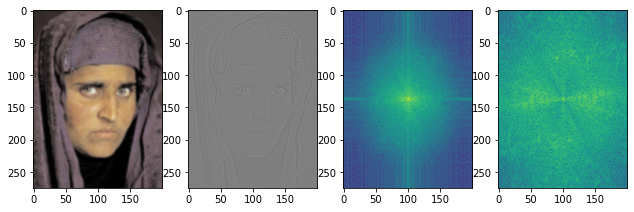

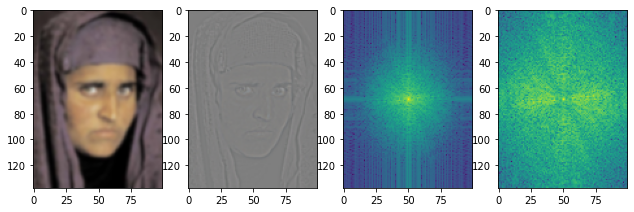

image  1


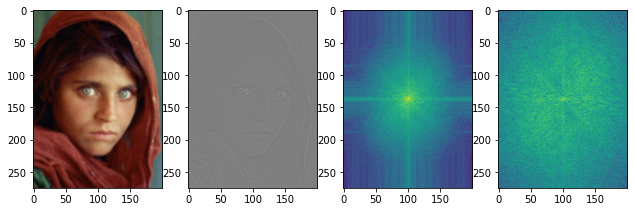

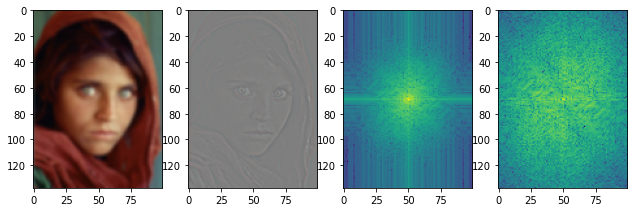

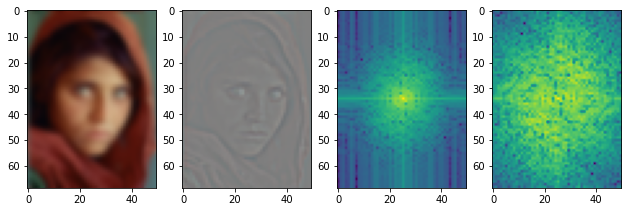

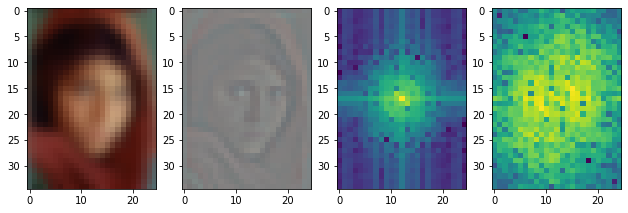

image  2


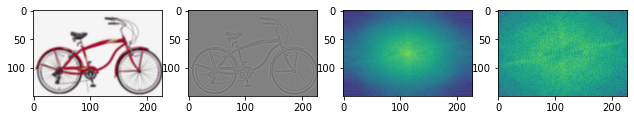

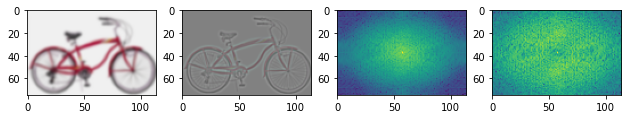

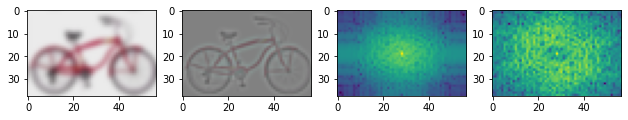

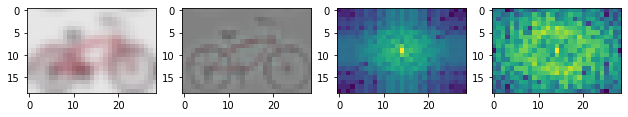

image  3


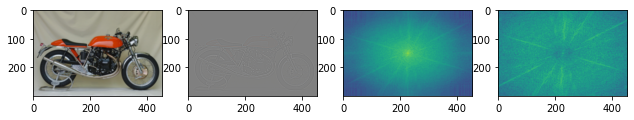

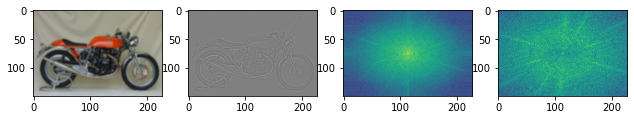

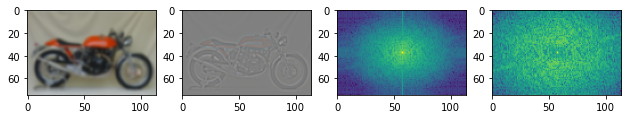

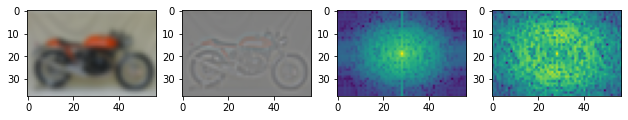

image  4


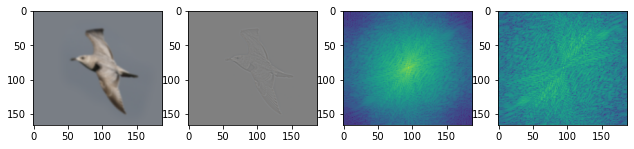

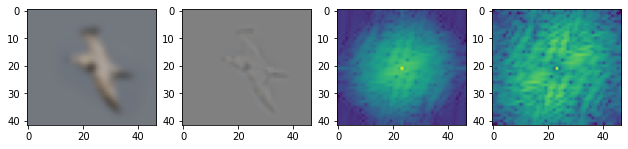

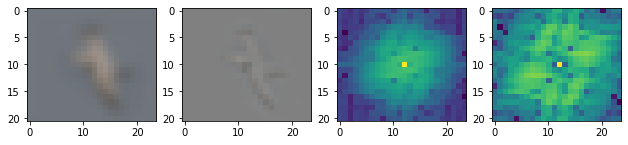

image  5


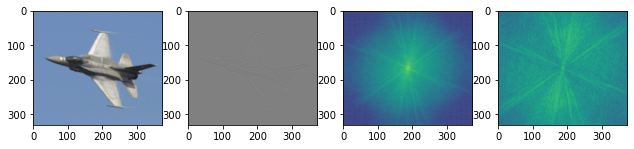

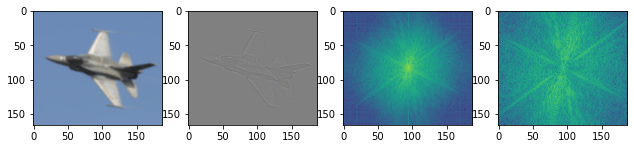

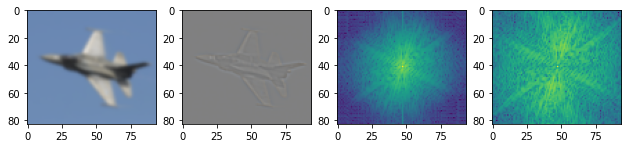

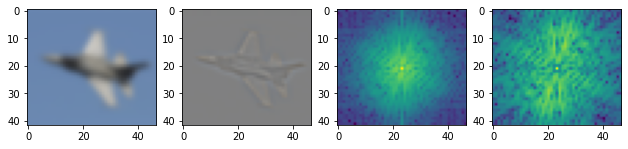

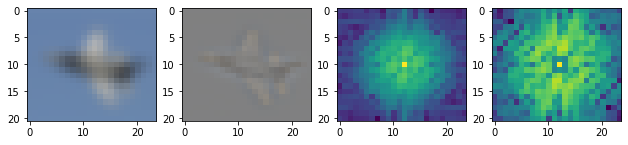

image  6


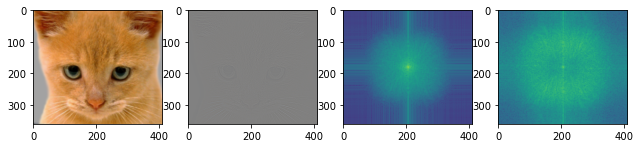

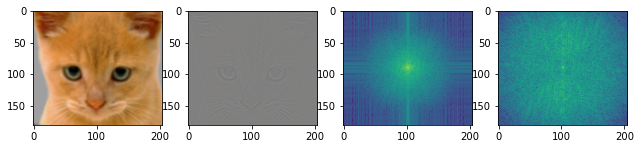

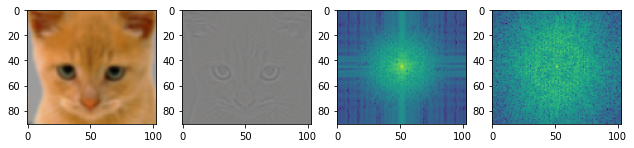

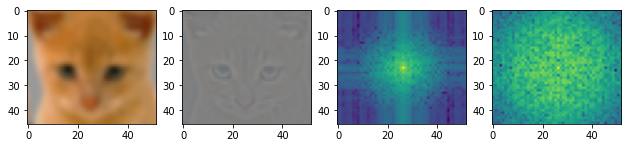

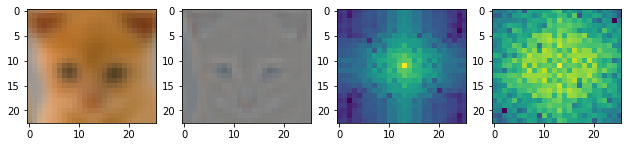

image  7


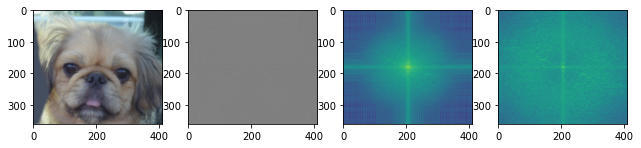

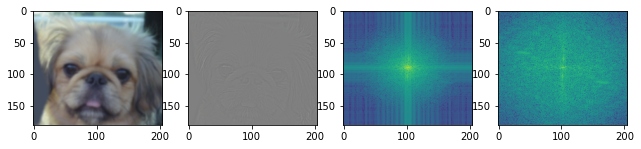

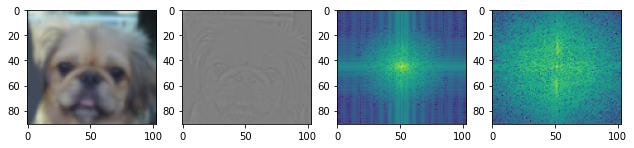

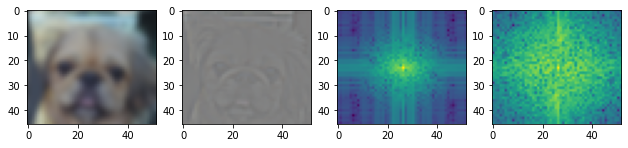

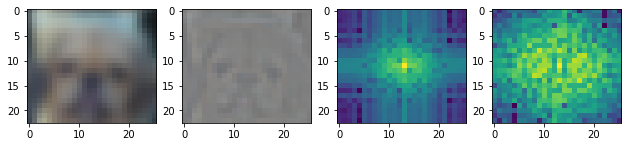

image  8


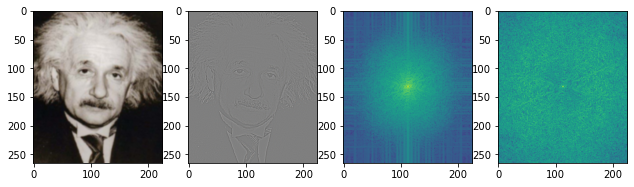

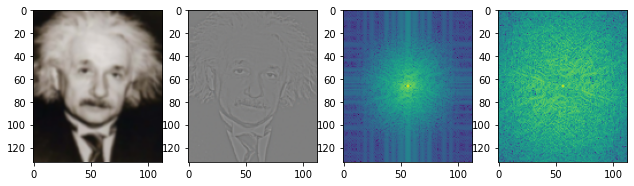

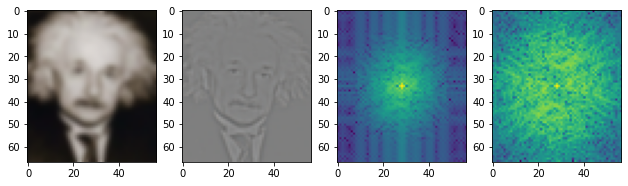

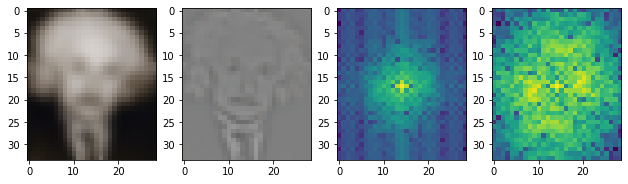

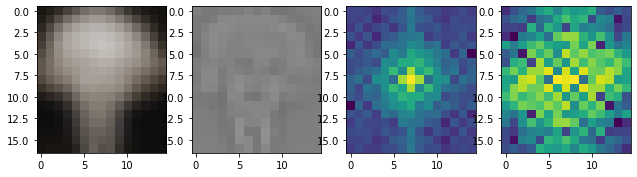

image  9


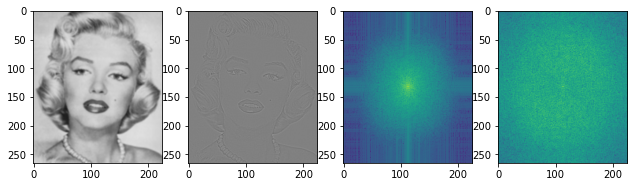

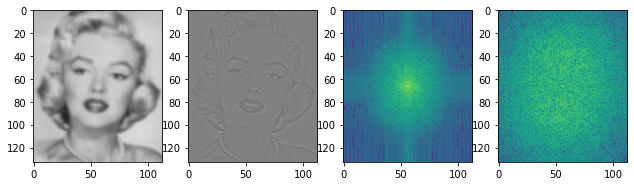

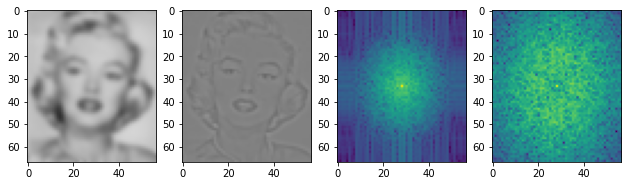

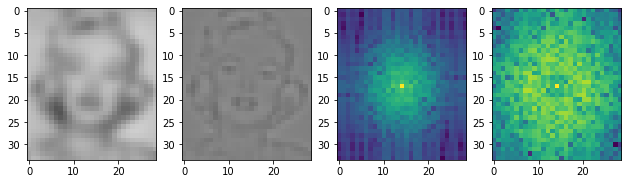

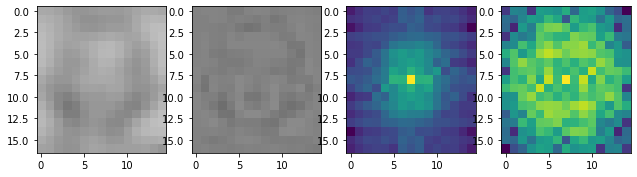

image  10


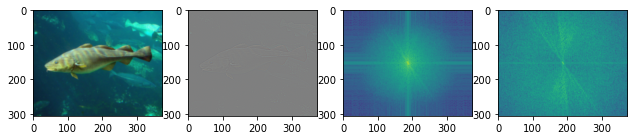

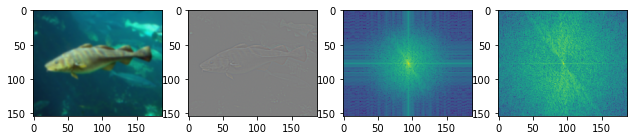

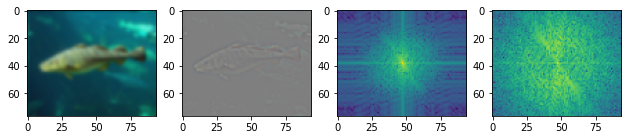

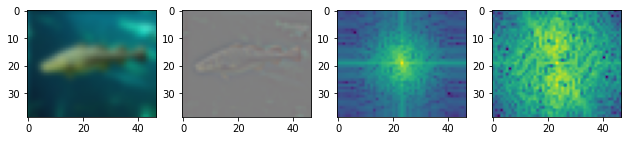

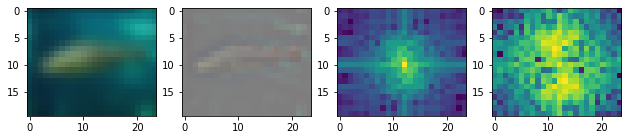

image  11


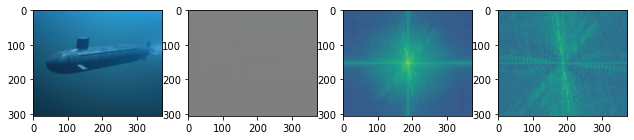

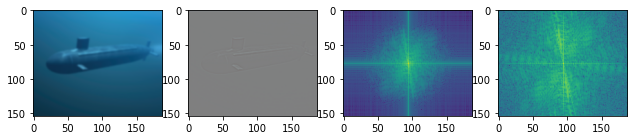

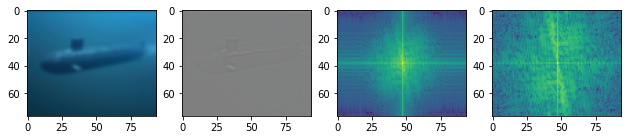

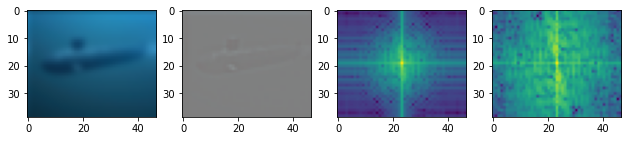

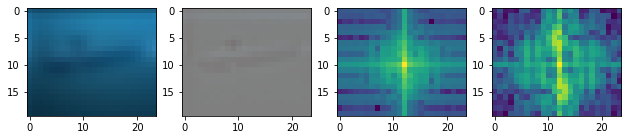

image  12


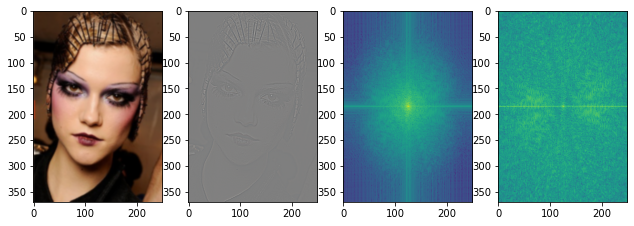

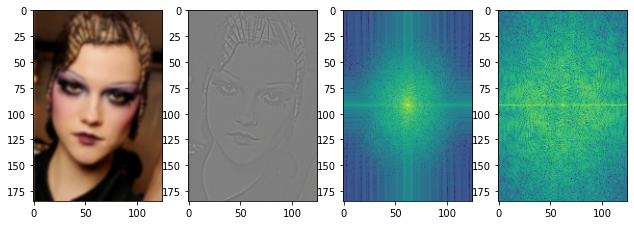

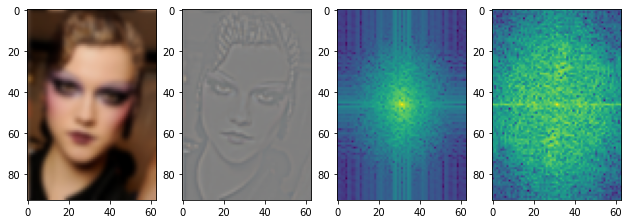

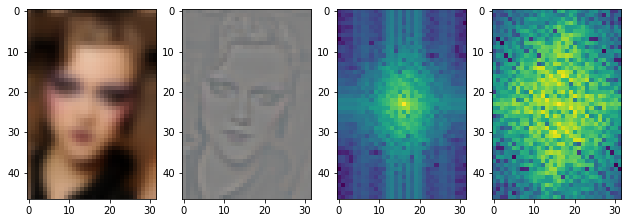

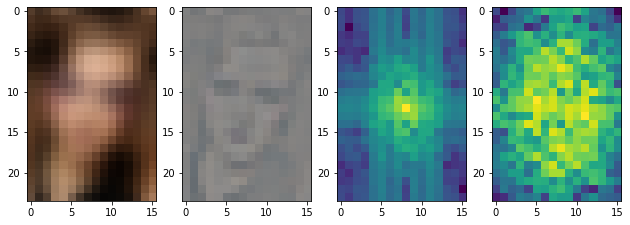

image  13


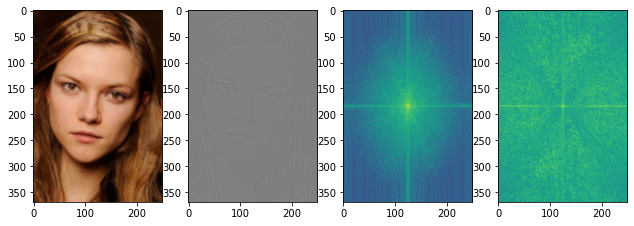

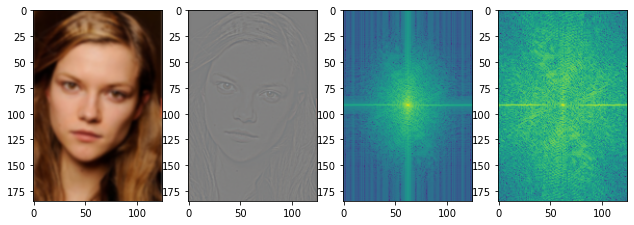

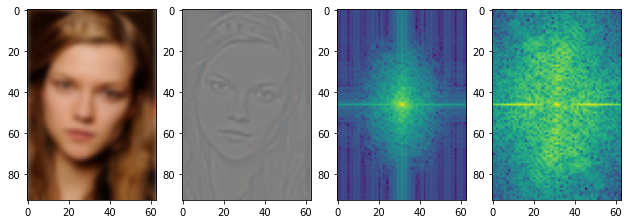

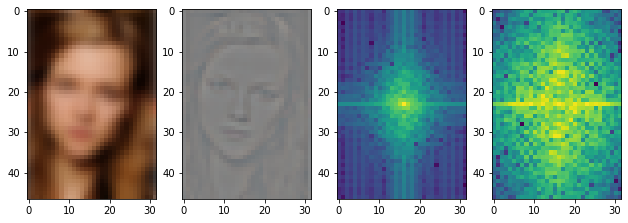

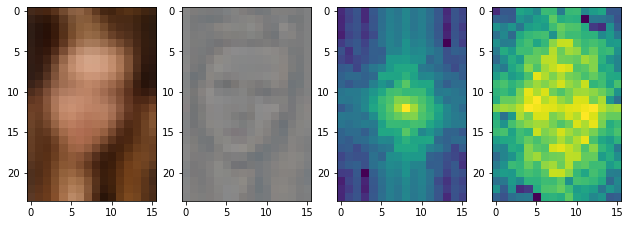

In [ ]:
# main
images = glob.glob("hw2_data/task1,2_hybrid_pyramid/*")
for i in range(len(images)):
    img = cv2.imread(images[i])
    print("image ", i)
    pyramid(img, 5)
